In [4]:
import pandas as pd
df = pd.read_csv("Advertising.csv")

In [5]:
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [6]:
print(df.dtypes)
print(df.isnull().sum())

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [7]:
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

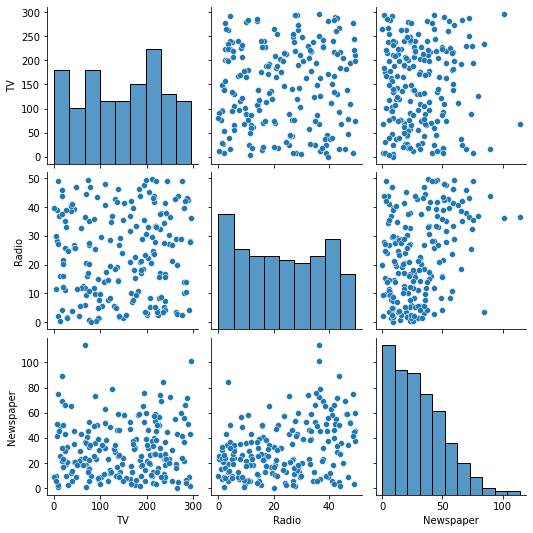

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(x)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x,y,
test_size=0.2,
random_state=42
)
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 3)
x_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


In [10]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
for actual, predicted in zip(y_test[:5], y_pred_lr[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

Actual: 16.90, Predicted: 16.41
Actual: 22.40, Predicted: 20.89
Actual: 21.40, Predicted: 21.55
Actual: 7.30, Predicted: 10.61
Actual: 24.70, Predicted: 22.11


In [12]:
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)
print("Feature Names:", x.columns.tolist())

Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]
Feature Names: ['TV', 'Radio', 'Newspaper']


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(x_train, y_train)
y_pred_poly = poly_model.predict(x_test)
for actual, predicted in zip(y_test[:5], y_pred_poly[:5]):
    print(f"Actual: {actual:.2f}, Predicted (Poly): {predicted:.2f}")

Actual: 16.90, Predicted (Poly): 17.25
Actual: 22.40, Predicted (Poly): 22.72
Actual: 21.40, Predicted (Poly): 20.43
Actual: 7.30, Predicted (Poly): 7.54
Actual: 24.70, Predicted (Poly): 24.37


In [17]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [18]:
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_test)
for actual, predicted in zip(y_test[:5], y_pred_svr[:5]):
    print(f"Actual: {actual:.2f}, Predicted (SVR): {predicted:.2f}")

Actual: 16.90, Predicted (SVR): 17.19
Actual: 22.40, Predicted (SVR): 21.60
Actual: 21.40, Predicted (SVR): 19.58
Actual: 7.30, Predicted (SVR): 9.77
Actual: 24.70, Predicted (SVR): 19.95


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [20]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\n{name} Evaluation:")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    return {'Model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}

In [21]:
results = []

results.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results.append(evaluate_model("Polynomial Regression", y_test, y_pred_poly))
results.append(evaluate_model("SVR", y_test, y_pred_svr))



Linear Regression Evaluation:
MAE:  1.46
MSE:  3.17
RMSE: 1.78

Polynomial Regression Evaluation:
MAE:  0.53
MSE:  0.41
RMSE: 0.64

SVR Evaluation:
MAE:  1.16
MSE:  2.86
RMSE: 1.69


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
results_df = pd.DataFrame(results)

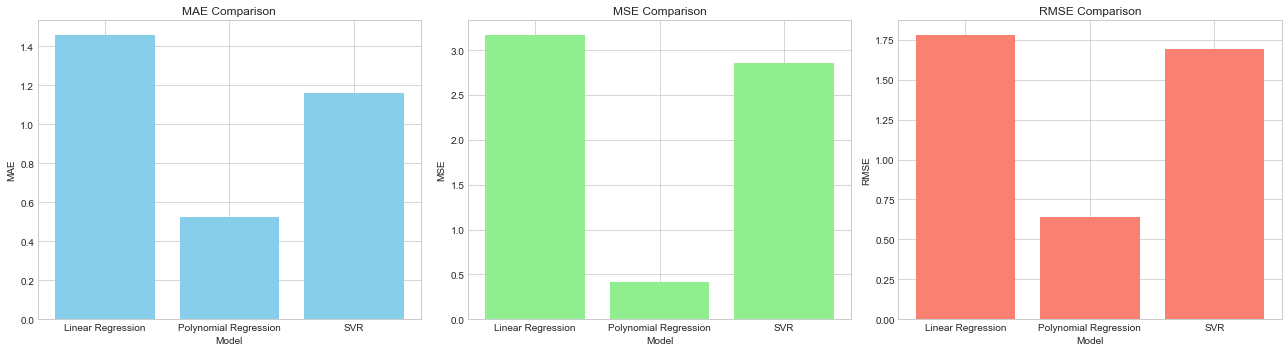

In [23]:
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['MAE', 'MSE', 'RMSE']
colors = ['skyblue', 'lightgreen', 'salmon']
for i, metric in enumerate(metrics):
    axes[i].bar(results_df['Model'], results_df[metric], color=colors[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
plt.tight_layout()
plt.show()

In [24]:
from sklearn.cluster import KMeans
X_cluster = df[['TV', 'Radio']] 

In [26]:
X_cluster = df[['TV', 'Radio']].copy()

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)
df['Cluster'] = clusters

In [28]:
print(df[['TV', 'Radio', 'Cluster']].head())

      TV  Radio  Cluster
0  230.1   37.8        1
1   44.5   39.3        2
2   17.2   45.9        2
3  151.5   41.3        0
4  180.8   10.8        0


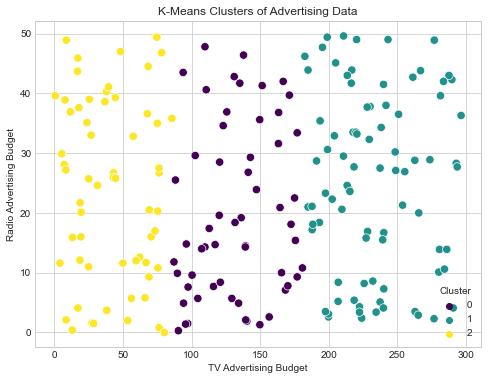

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='TV', y='Radio', hue='Cluster', palette='viridis', s=70)
plt.title('K-Means Clusters of Advertising Data')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Radio Advertising Budget')
plt.legend(title='Cluster')
plt.show()